Review

In [296]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

fruits = pd.read_table('fruit_colors.txt')

X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']


fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))

knn1 = KNeighborsClassifier(n_neighbors = 1)
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn3 = KNeighborsClassifier(n_neighbors = 5)

avg1 = 0
avg2 = 0
avg3 = 0

for i in range(10):
  X_train,X_test, y_train, y_test = train_test_split(X, y)
  knn1.fit(X_train,y_train)
  knn2.fit(X_train,y_train)
  knn3.fit(X_train,y_train)


  avg1 += knn1.score(X_test,y_test)
  avg2 += knn2.score(X_test,y_test)
  avg3 += knn3.score(X_test,y_test)

avg1 /= 10
avg2 /= 10
avg3 /= 10

print(avg1, "   ", avg2, "   ", avg3)

0.6533333333333333     0.6666666666666665     0.5599999999999999


Synthetic Datasets

Regression

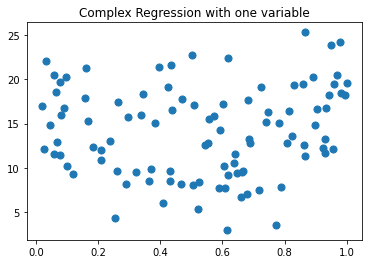

In [297]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1

plt.figure()
plt.title('Complex Regression with one variable')
x_f1, y_f1 = make_friedman1(n_samples = 100, n_features= 7, random_state = 0)
plt.scatter(x_f1[:, 2], y_f1, marker = 'o', s=50)
plt.show()

Binary Classification

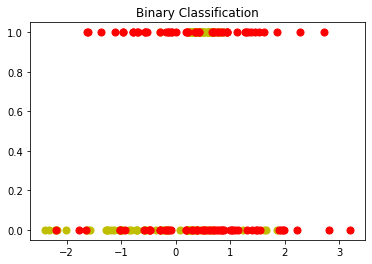

In [298]:
from sklearn.datasets import make_classification

plt.figure()
plt.title('Binary Classification')
x_c1, y_c1 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, flip_y = 0.1,class_sep = 0.5, random_state = 0)
plt.scatter(x_c1[:, 0], y_c1, s = 50, c = 'y')
plt.scatter(x_c1[:, 1], y_c1, s = 50, c = 'r')

plt.show()

Knn Regression

In [299]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

fruits = pd.read_table('fruit_colors.txt')
x = fruits[['mass', 'width','height', 'color_score']]
y = fruits['fruit_label']

x_train, x_test, y_train, y_test = train_test_split(x, y)

knn = KNeighborsRegressor(n_neighbors=3).fit(x_train,y_train)
print('R sq. test score', knn.score(x_test, y_test))

R sq. test score 0.2829457364341085


Linear Regression

In [0]:
# Preprocess Data
fruits = pd.read_table('fruit_colors.txt')
x = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

linreg = LinearRegression().fit(x_train, y_train)
print(linreg.intercept_)
print(linreg.coef_)

9.83573940925593
[ 0.01879966 -1.91964979  0.4226744 ]


0.11996287693912278


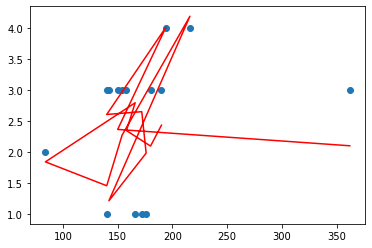

In [302]:
plt.figure()
plt.scatter(x_test.iloc[:, 0], y_test)
plt.plot(x_test.iloc[:, 0], linreg.predict(x_test), color= 'r')
print(linreg.score(x_test, y_test))

Ridge Regression

In [303]:
from sklearn.linear_model import Ridge

rigreg = Ridge().fit(x_train, y_train)

print("train", rigreg.score(x_train,y_train))
print("test", rigreg.score(x_test,y_test))

train 0.72029053335627
test 0.1854858219301464


Ridge Regression with Min Max Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train_scaled, x_test_scaled, y_train_scaled,y_test_scaled = train_test_split(x_scaled, y, random_state = 0)

In [305]:
newridge = Ridge().fit(x_train_scaled, y_train_scaled)

print("train", newridge.score(x_train_scaled,y_train_scaled))
print("test", newridge.score(x_test_scaled,y_test_scaled))

train 0.5199061745325924
test 0.2557591281893371


Lasso Regression


In [306]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train_scaled,y_train)

print("train", lasso.score(x_train_scaled,y_train_scaled))
print("test", lasso.score(x_test_scaled,y_test_scaled))

train 0.0
test -0.00014007564084606017


Polynomial Transformation

In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

x_poly = poly.fit_transform(x)
x_train_poly, x_test_poly,y_train_poly,  y_test_poly = train_test_split(x_poly, y, random_state = 0)

linreg = LinearRegression().fit(x_train_poly, y_train_poly)
print("train", linreg.score(x_train_poly,y_train_poly))
print("test", linreg.score(x_test_poly,y_test_poly))

train 0.7663254685262668
test -0.0991544733749321
